## KHR Group Work

### Data description
<b>Chest pain type</b>: <br>
<b>ATA</b> - Atypical angina - Angina pectoris which does not have associated classical symptoms of chest pain. Symptoms may include weakness, nausea, or sweating.<br>
<br>
<b>NAP</b> - Non-anginal pain - A chest pain is very likely nonanginal if its duration is over 30 minutes or less than 5 seconds, it increases with inspiration, can be brought on with one movement of the trunk or arm, can be brought on by local fingers pressure, or bending forward, or it can be relieved immediately on lying down.<br>
<br>
<b>ASY</b> - Asymtomatic - Silent (asymptomatic) myocardial ischemia (SMI) is defined as a transient alteration in myocardial perfusion in the absence of chest pain or the usual anginal equivalents.  <br>
<br>
<b>TA</b> - Typical angina - The most common symptom of a heart attack in both males and females is chest pain or discomfort and this can be described as tightness, pressure, squeezing or aching.<br>

<b>RestingBP</b> - resting blood pressure [mm Hg].
<img src="bp.jpg" alt="Blood Pressure" width="500" height="600"> <br>

<b>Cholesterol</b> - serum cholesterol [mm/dl]. (mm/dl Mistake? should be mg/dL?) Measuring your LDL (“bad” cholesterol), HDL (“good” cholesterol), and triglycerides will give you a number called your total blood cholesterol, or serum cholesterol. Healthy serum cholesterol is less than 200 mg/dL. Serum cholesterol = HDL + LDL cholesterol levels + 20 percent of triglycerides.(source:https://www.healthline.com/health/serum-cholesterol) <br>
<br>

<b>FastingBS</b> - fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise] <br>
The expected values for normal fasting blood glucose concentration are between 70 mg/dL (3.9 mmol/L) and 100 mg/dL (5.6 mmol/L). When fasting blood glucose is between 100 to 125 mg/dL (5.6 to 6.9 mmol/L) changes in lifestyle and monitoring glycemia are recommended. If fasting blood glucose is 126 mg/dL (7 mmol/L) or higher on two separate tests, diabetes is diagnosed. An individual with low fasting blood glucose concentration (hypoglycemia) – below 70 mg/dL (3.9 mmol/L) – will experience dizziness, sweating, palpitations, blurred vision and other symptoms that have to be monitored. (source: https://www.who.int/data/gho/indicator-metadata-registry/imr-details/2380)<br>
<br>

<b>Resting ECG</b> - resting electrocardiogram results:<br>
<b>Normal</b>: Normal, <br>
<b>ST</b>: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV),<br>
<b>LVH</b>: showing probable or definite left ventricular hypertrophy by Estes' criteria].<br>
<br>

<b>MaxHR</b> - maximum heart rate achieved [Numeric value between 60 and 202] <br>
<br>
<b>ExerciseAngina</b> - exercise-induced angina [Y: Yes, N: No] <br>
<br>
<b>Oldpeak</b> ST [Numeric value measured in depression] ST depression induced by exercise relative
to rest. (Basicly a line in EKG doesn't come back to zero state, where it should come) (source: https://www.ijrte.org/wp-content/uploads/papers/v8i2S3/B11630782S319.pdf)

<b>ST_Slope</b> - the slope of the peak exercise ST segment. (Basicly the shape of line in certain place in EKG). <br>
<b>Up</b>: upsloping, <br>
<b>Flat</b>: flat, <br>
<b>Down</b>: downsloping. <br>
<br>
<b>HeartDisease</b>: output class [1: heart disease, 0: Normal]





## First look at data

In [1]:
import pandas as pd
data = pd.read_csv('heart.csv')
data.shape
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


### Distribution of age into 5 bins and men and women separately into same 5 age bins

Minimum age 28
Maximum age 77
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


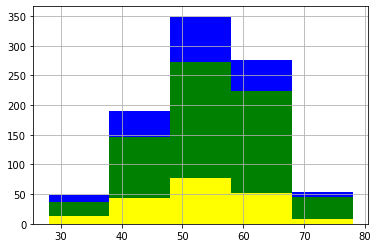

In [15]:
print("Minimum age", data.Age.min())
print("Maximum age", data.Age.max())

bins = [28, 38, 48, 58, 68, 78]

#all data into bins
print(data[('Age')].hist(bins=bins,color='blue'))

#men and women separatewly into bins
men = data[data['Sex'] == 'M']
women = data[data['Sex'] == 'F']
print(men[('Age')].hist(bins=bins,color='green'))
print(women[('Age')].hist(bins=bins,color='yellow'))

In [14]:
# women in age bin of 68-78, only 8 instances and olny one with heart failure. If that instance happens not to be in 
# training set, then can't predict that.
women_68_78 = women[women['Age'] > 67]
women_68_78.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
375,73,F,NAP,160,0,0,ST,121,N,0.0,Up,1
619,74,F,ATA,120,269,0,LVH,121,Y,0.2,Up,0
630,71,F,ASY,112,149,0,Normal,125,N,1.6,Flat,0
644,71,F,NAP,110,265,1,LVH,130,N,0.0,Up,0
688,76,F,NAP,140,197,0,ST,116,N,1.1,Flat,0
788,68,F,NAP,120,211,0,LVH,115,N,1.5,Flat,0
813,69,F,TA,140,239,0,Normal,151,N,1.8,Up,0
870,71,F,ATA,160,302,0,Normal,162,N,0.4,Up,0


### Counts of features values

In [3]:
#count of ChestPainType type values
data['ChestPainType'].value_counts()

ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64

In [4]:
#count of 'FastingBS' values
data['FastingBS'].value_counts()

0    704
1    214
Name: FastingBS, dtype: int64

In [5]:
#count of 'ExerciseAngina' yes, no values
data['ExerciseAngina'].value_counts()

N    547
Y    371
Name: ExerciseAngina, dtype: int64

In [6]:
#count of 'Oldpeak' values
data['Oldpeak'].value_counts()

 0.0    368
 1.0     86
 2.0     76
 1.5     53
 3.0     28
 1.2     26
 0.2     22
 0.5     19
 1.4     18
 1.8     17
 2.5     16
 0.8     16
 1.6     16
 0.1     14
 0.6     14
 0.4     11
 0.3     11
 4.0      8
 0.7      7
 2.8      7
 1.3      7
 2.6      7
 1.1      7
 1.9      7
 1.7      6
 2.2      5
 0.9      4
 3.6      4
 2.4      4
 3.4      3
 2.1      2
-0.1      2
 4.2      2
 3.2      2
 3.5      2
-0.5      2
 2.3      2
-1.0      2
 2.9      1
 3.8      1
-0.9      1
-2.6      1
-1.5      1
 3.7      1
 5.0      1
-2.0      1
-0.8      1
 3.1      1
 4.4      1
 5.6      1
 6.2      1
-0.7      1
-1.1      1
Name: Oldpeak, dtype: int64

In [7]:
#count of 'ST_Slope' values
data['ST_Slope'].value_counts()

Flat    460
Up      395
Down     63
Name: ST_Slope, dtype: int64